In [1]:
import sys
sys.path.append('..')

In [2]:
from src.utils.preprocess import InferencePreprocessor
from src.data import inference_examination_to_tensor

/home/borntowarn/projects/chest-diseases/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
result = inference_examination_to_tensor('/home/borntowarn/projects/chest-diseases/1.zip')


2025-09-30 13:30:39.984 | INFO     | src.data:inference_examination_to_tensor:307 - Обработка DICOM исследования
2025-09-30 13:30:39.985 | INFO     | src.utils.preprocess:extract_archive_to_dir:91 - Распаковка архива /home/borntowarn/projects/chest-diseases/1.zip в /tmp/tmpwnbqmlve
2025-09-30 13:30:44.010 | INFO     | src.utils.preprocess:extract_archive_to_dir:108 - Архив /home/borntowarn/projects/chest-diseases/1.zip распакован в /tmp/tmpwnbqmlve
2025-09-30 13:30:44.011 | INFO     | src.utils.preprocess:get_valid_series:168 - Чтение КТ-серий из /tmp/tmpwnbqmlve
2025-09-30 13:30:44.756 | WARNING  | src.utils.preprocess:get_valid_series:194 - Ошибка чтения файла /tmp/tmpwnbqmlve/1.2.643.5.1.13.13.12.2.77.8252.00070114131113031501120012040609/services/__main__.log: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.
2025-09-30 13:30:44.758 | WARNING  | src.utils.preprocess:get_valid_series:194 - Ошибка чтен

In [4]:
result

{'tensor': tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]],
 
          [[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]],
 
          [[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]],
 
          ...,
 
          [[-1., -1., -1.,  ..., -

In [4]:
result

{'tensor': tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]],
 
          [[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]],
 
          [[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]],
 
          ...,
 
          [[-1., -1., -1.,  ..., -

tensor(-1.) tensor(1.)


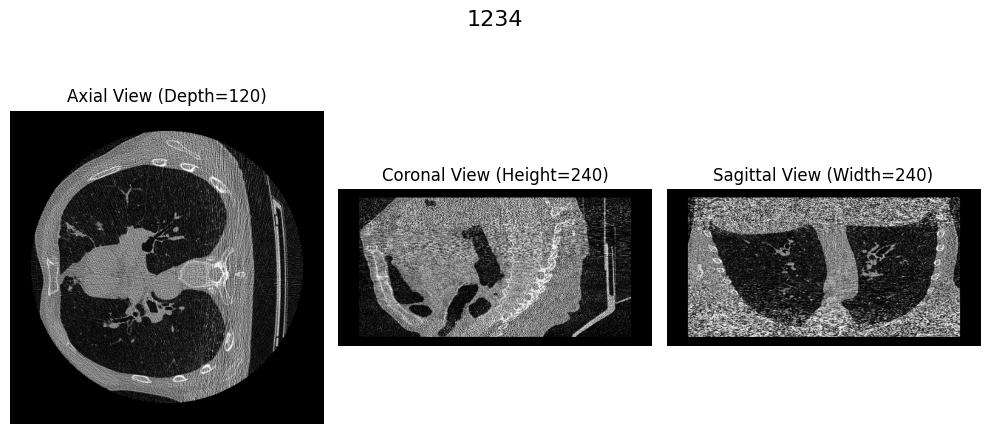

In [5]:
import torchio
import matplotlib.pyplot as plt

dicom_tensor = result['tensor']
print(dicom_tensor.min(), dicom_tensor.max())

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Plot the first slice (axial view)
axes[0].imshow(dicom_tensor[0, 120, :, :], cmap='gray')
axes[0].set_title('Axial View (Depth=120)')

# Plot the second slice (coronal view)
axes[1].imshow(dicom_tensor[0, :, 240, :], cmap='gray')
axes[1].set_title('Coronal View (Height=240)')

# Plot the third slice (sagittal view)
axes[2].imshow(dicom_tensor[0, :, :, 240], cmap='gray')
axes[2].set_title('Sagittal View (Width=240)')

for ax in axes:
    ax.axis('off')

fig.suptitle('1234', fontsize=16)

plt.tight_layout()
plt.show()